![](https://upload.wikimedia.org/wikipedia/commons/5/50/Japanese_car_accident_blur.jpg)

# Road Accident Casualties
---
## Background

Road accidents continue to pose a significant threat to public safety globally, causing injuries, fatalities, and economic losses. Analyzing road accident casualty records can provide invaluable insights into the factors contributing to these incidents. The dataset under consideration encompasses detailed information about accident severity, environmental conditions, geographical locations, and vehicle-related variables recorded throughout England and Wales from 2019 to 2022. Understanding the relationships and patterns within this dataset offers an opportunity to identify key risk factors and develop targeted strategies to mitigate road accidents' impact.

## Objective
The primary objective of this data science project is to leverage machine learning and statistical analysis techniques to predict accident severity. By developing predictive model and conducting exploratory data analysis, the project aims to understand how various factors like weather conditions, road types, lighting, and vehicle characteristics impact accident severity. Geospatial analysis will be employed to pinpoint high-risk areas.

## Data

The dataset, sourced from Kaggle (willianoliveiragibin/road-accident-casualties), comprises comprehensive road accident casualty records throughout England and Wales from 2019 to 2022, offering a rich repository of information crucial for understanding and mitigating road accidents. It encompasses various features that intricately detail the circumstances surrounding each incident. The key features within this dataset include:

* Accident Severity: Indicates the severity level of each accident, categorizing them as slight, serious, or fatal.
* Light Conditions: Describes the lighting status during the accident, distinguishing between daylight, darkness with street lights, darkness without street lights, and other conditions.
* Accident Date: Specifies the date when the accident occurred.
* District Area: Indicates the geographical area or district where the accident occurred.
* Latitude & Longitude: Provide the precise geographical coordinates of the accident location.
* Number of Vehicles: Records the count of vehicles involved in each accident.
* Number of Casualties: Indicates the number of individuals affected by the accident.
* Road Surface Conditions: Describes the state of the road surface during the accident, such as dry, wet, snow, ice, etc.
* Road Type: Specifies the type of road where the accident occurred, whether single carriageway, dual carriageway, or other designations.
* Urban or Rural Area: Indicates whether the accident took place in an urban or rural setting.
* Vehicle Type: Records the types of vehicles involved, including cars, vans, motorcycles, etc.
* Weather Conditions: Describes the prevailing weather conditions at the time of the accident, such as rain, fog, clear skies, etc.

## Imports
---

In [1]:
import glob
import numpy as np
import pandas as pd
import plotly_express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
path = r'/kaggle/input/road-accident-casualties/*.csv'
all_files = glob.glob(path)

df = pd.concat((pd.read_csv(f) for f in all_files), axis=1)

# Data Cleaning
---

In [3]:
df.head()

,Accident_Date,Latitude,Number_of_Casualties,Light_Conditions,Index,Longitude,Urban_or_Rural_Area,Accident_Severity,District_Area,Road_Surface_Conditions,Number_of_Vehicles,Road_Type,Weather_Conditions,Vehicle_Type
0,2019-01-08,50.820746,7,Darkness - lights unlit,2.01E+12,-0.325025,Unallocated,Fatal,Adur,Flood over 3cm. deep,1,Slip road,Snowing + high winds,Minibus (8 - 16 passenger seats)
1,2019-01-18,50.831465,6,Darkness - lights unlit,2.01E+12,-0.295104,Unallocated,Fatal,Adur,Flood over 3cm. deep,1,Slip road,Snowing + high winds,Agricultural vehicle
2,2019-01-29,50.827024,6,Darkness - lights unlit,2.01E+12,-0.323807,Unallocated,Fatal,Adur,Flood over 3cm. deep,1,Slip road,Snowing + high winds,Agricultural vehicle
3,2019-02-10,50.839773,6,Darkness - lights unlit,2.01E+12,-0.303607,Rural,Fatal,Adur,Flood over 3cm. deep,1,Slip road,Snowing + high winds,Agricultural vehicle
4,2019-02-09,50.847946,6,Darkness - lights unlit,2.01E+12,-0.284417,Rural,Fatal,Adur,Flood over 3cm. deep,1,Slip road,Snowing + high winds,Minibus (8 - 16 passenger seats)


In [4]:
df.info() # Summary of DataFrame information

print('\nNumber of unique values in each column')
for i in df.columns:
    print(f'{i} - {df[i].nunique()}')

print('\nNumber of missing values in each column')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660669 entries, 0 to 660668
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Accident_Date            625000 non-null  object 
 1   Latitude                 660653 non-null  float64
 2   Number_of_Casualties     660669 non-null  int64  
 3   Light_Conditions         603638 non-null  object 
 4   Index                    579474 non-null  object 
 5   Longitude                660653 non-null  float64
 6   Urban_or_Rural_Area      660654 non-null  object 
 7   Accident_Severity        660669 non-null  object 
 8   District_Area            623498 non-null  object 
 9   Road_Surface_Conditions  659943 non-null  object 
 10  Number_of_Vehicles       660669 non-null  int64  
 11  Road_Type                443385 non-null  object 
 12  Weather_Conditions       423735 non-null  object 
 13  Vehicle_Type             657364 non-null  object 
dtypes: f

Accident_Date               35669
Latitude                       16
Number_of_Casualties            0
Light_Conditions            57031
Index                       81195
Longitude                      16
Urban_or_Rural_Area            15
Accident_Severity               0
District_Area               37171
Road_Surface_Conditions       726
Number_of_Vehicles              0
Road_Type                  217284
Weather_Conditions         236934
Vehicle_Type                 3305
dtype: int64

In [5]:
# Drop unnecessary columns
df = df.drop(['Index'],axis=1)

In [6]:
# Fill missing values
df.fillna({'Road_Type': 'Unspecified', 'Weather_Conditions': 'Other',
           'Light_Conditions': 'Unspecified', 'Road_Surface_Conditions': 'Unspecified',
          'District_Area': 'Unspecified', 'Vehicle_Type': 'Unspecified'}, inplace=True)

In [7]:
# Drop missing values
df.dropna(subset=['Longitude'], inplace=True)
df.dropna(subset=['Accident_Date'], inplace=True)

In [8]:
# Filter data
df = df[df['Urban_or_Rural_Area'] != 'Unallocated']

In [9]:
# Convert 'Accident_Date' to datetime format
df['Accident_Date'] = pd.to_datetime(df['Accident_Date'])

# Exploratory Data Analysis
---

### Accident Severity analysis

/tmp/ipykernel_18/2042362122.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)


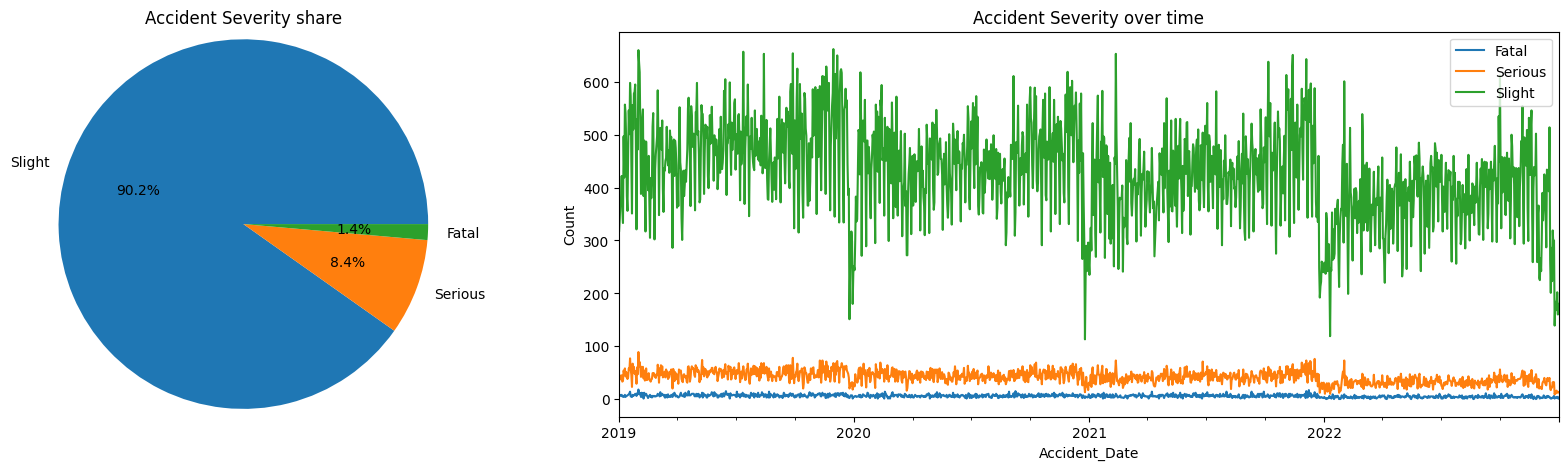

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw={'width_ratios': [1, 2]})

# First plot: Pie chart of accident severity share
ax1 = axs[0]
# Get the count of accidents for each severity level
subject = df['Accident_Severity'].value_counts().reset_index(name='Count')
ax1.pie(subject['Count'], labels=subject['Accident_Severity'], autopct='%1.1f%%', radius=1.2)
ax1.set_title('Accident Severity share')

# Second plot: Stacked line chart of accident severity over time
ax2 = axs[1]
# Group data by accident date and severity, count occurrences, and create a pivot table
subject = df.groupby([df['Accident_Date'], 'Accident_Severity']).size().reset_index(name='Count')
pivot_df = subject.pivot(index='Accident_Date', columns='Accident_Severity', values='Count')
pivot_df.plot(kind='line', stacked=True, ax=ax2)
ax2.set_ylabel('Count')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_title('Accident Severity over time')
ax2.legend(loc="upper right")

plt.show()

* Pie Chart (Accident Severity Share):

Visualizes the proportion of accidents in each severity category (e.g., Fatal, Serious, Slight).

**It shows that majority of Road accidents result in Slight severity, about 8% are Serious and less than 2% are Fatal accidents**

* Stacked Line Chart (Accident Severity Over Time):

Displays the number of accidents in each severity category over time.

**It shows that accident number has been trending down from 2019 to 2023.**

### Locations with 5 or more Road Accidents with fatality level

In [11]:
# Group accidents by latitude, longitude, and severity, count occurrences, and create a DataFrame
geo = df.groupby(['Latitude', 'Longitude', 'Accident_Severity']).size().sort_values(ascending=False).to_frame(name='count').reset_index()
# Create an interactive scatter map using Plotly Express
fig = px.scatter_mapbox(geo.query('count > 5'), lat="Latitude", lon="Longitude", color='Accident_Severity', zoom=3, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

* Interactive Scatter Map of Accident Severity:

Visualizes the geographic distribution of accidents with different severities.
Each marker represents a location with at least 5 accidents.
Marker color indicates the accident severity (e.g., green for fatal, red for serious, blue for slight).
Zoom level can be adjusted to focus on specific areas.
Hovering over markers reveals additional details like the exact count of accidents at that location.
Basemap uses OpenStreetMap for a detailed visual context.

**It shows that majority of accidents happen in London and in mid-lands, around the major cities such as Birmingham, Manchester, Leeds and Sheffield.**

### Light Conditions

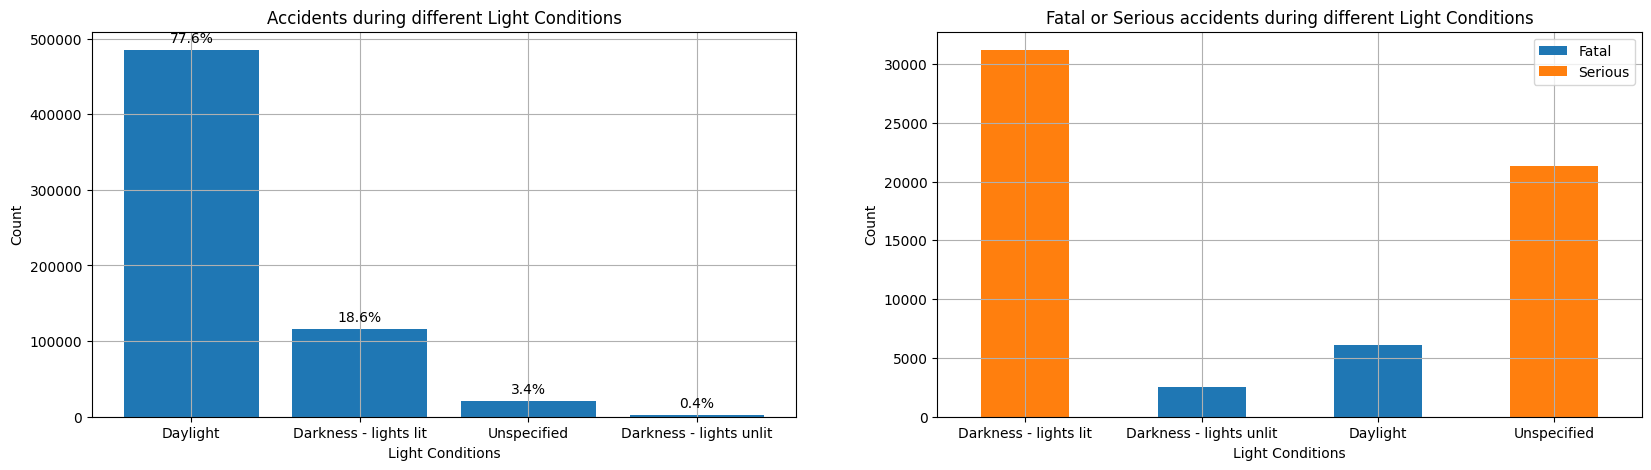

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# First plot: Bar chart of accidents during different light conditions
ax1 = axs[0]
# Get the count of accidents for each light condition
subject = df['Light_Conditions'].value_counts().reset_index(name='Count')
ax1.bar(subject['Light_Conditions'], subject['Count'])
percentage = subject['Count'].div(subject['Count'].sum()) * 100
ax1.bar_label(ax1.containers[0], labels=['{:.1f}%'.format(p) for p in percentage], padding=3)
ax1.set_xlabel('Light Conditions')
ax1.set_ylabel('Count')
ax1.set_title('Accidents during different Light Conditions')
ax1.grid(True)



# Second plot: Stacked bar chart of fatal or serious accidents during different light conditions
ax2 = axs[1]
# Filter data for fatal or serious accidents
subject = df[df['Accident_Severity'] != 'Slight'].groupby(['Light_Conditions', 'Accident_Severity']).size().reset_index(name='Count')
pivot_df = subject.pivot(index='Light_Conditions', columns='Accident_Severity', values='Count')
pivot_df.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xlabel('Light Conditions')
ax2.set_ylabel('Count')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_title('Fatal or Serious accidents during different Light Conditions')
ax2.legend(loc="upper right")
ax2.grid(True)



plt.show()

* Bar Chart (Accidents During Different Light Conditions):

Shows the total number of accidents that occurred under each light condition (e.g., daylight, darkness with lights lit).

**Majority of accidents happen in Daylight.**

* Stacked Bar Chart (Fatal or Serious Accidents During Different Light Conditions):

Specifically focuses on fatal or serious accidents.
Displays the breakdown of fatal and serious accidents within each light condition.

**It shows that Fatal accidents happen in Daylight or in Dark time with lights unlit. Serious accidents also happen in Darkness, even with lights lit.**

### Weather Conditions

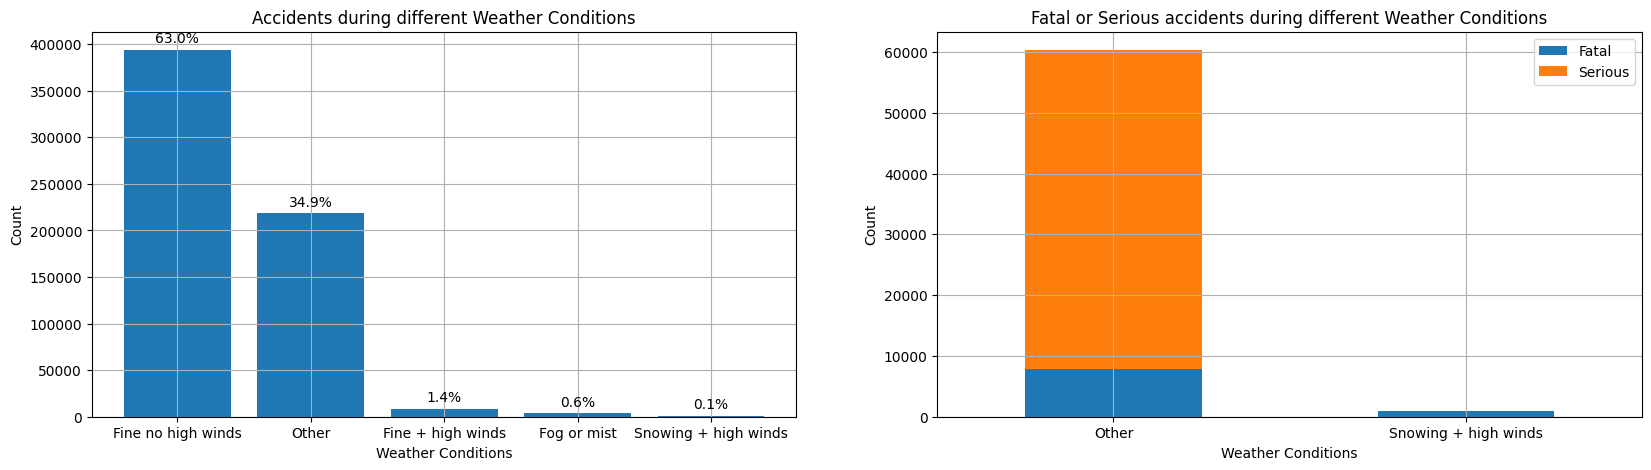

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# First plot: Bar chart of accidents during different weather conditions
ax1 = axs[0]
# Get the count of accidents for each weather condition
subject = df['Weather_Conditions'].value_counts().reset_index(name='Count')
ax1.bar(subject['Weather_Conditions'], subject['Count'])
percentage = subject['Count'].div(subject['Count'].sum()) * 100
ax1.bar_label(ax1.containers[0], labels=['{:.1f}%'.format(p) for p in percentage], padding=3)
ax1.set_xlabel('Weather Conditions')
ax1.set_ylabel('Count')
ax1.set_title('Accidents during different Weather Conditions')
ax1.grid(True)

# Second plot: Stacked bar chart of fatal or serious accidents during different weather conditions
ax2 = axs[1]
# Filter data for fatal or serious accidents
subject = df[df['Accident_Severity'] != 'Slight'].groupby(['Weather_Conditions', 'Accident_Severity']).size().reset_index(name='Count')
pivot_df = subject.pivot(index='Weather_Conditions', columns='Accident_Severity', values='Count')
pivot_df.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xlabel('Weather Conditions')
ax2.set_ylabel('Count')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_title('Fatal or Serious accidents during different Weather Conditions')
ax2.legend(loc="upper right")
ax2.grid(True)

plt.show()

* Bar Chart (Accidents During Different Weather Conditions):

Shows the total number of accidents that occurred under each weather condition (e.g., fine, raining, snowing).

**Majority of Accidents happen during fine weather conditions with no winds.**

* Stacked Bar Chart (Fatal or Serious Accidents During Different Weather Conditions):

Specifically focuses on fatal or serious accidents.
Displays the breakdown of fatal and serious accidents within each weather condition.

**Majority of Fatal or Serious accidents did not had Weather conditions clearly specified.**

### Vehicle Type

/tmp/ipykernel_18/586952646.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



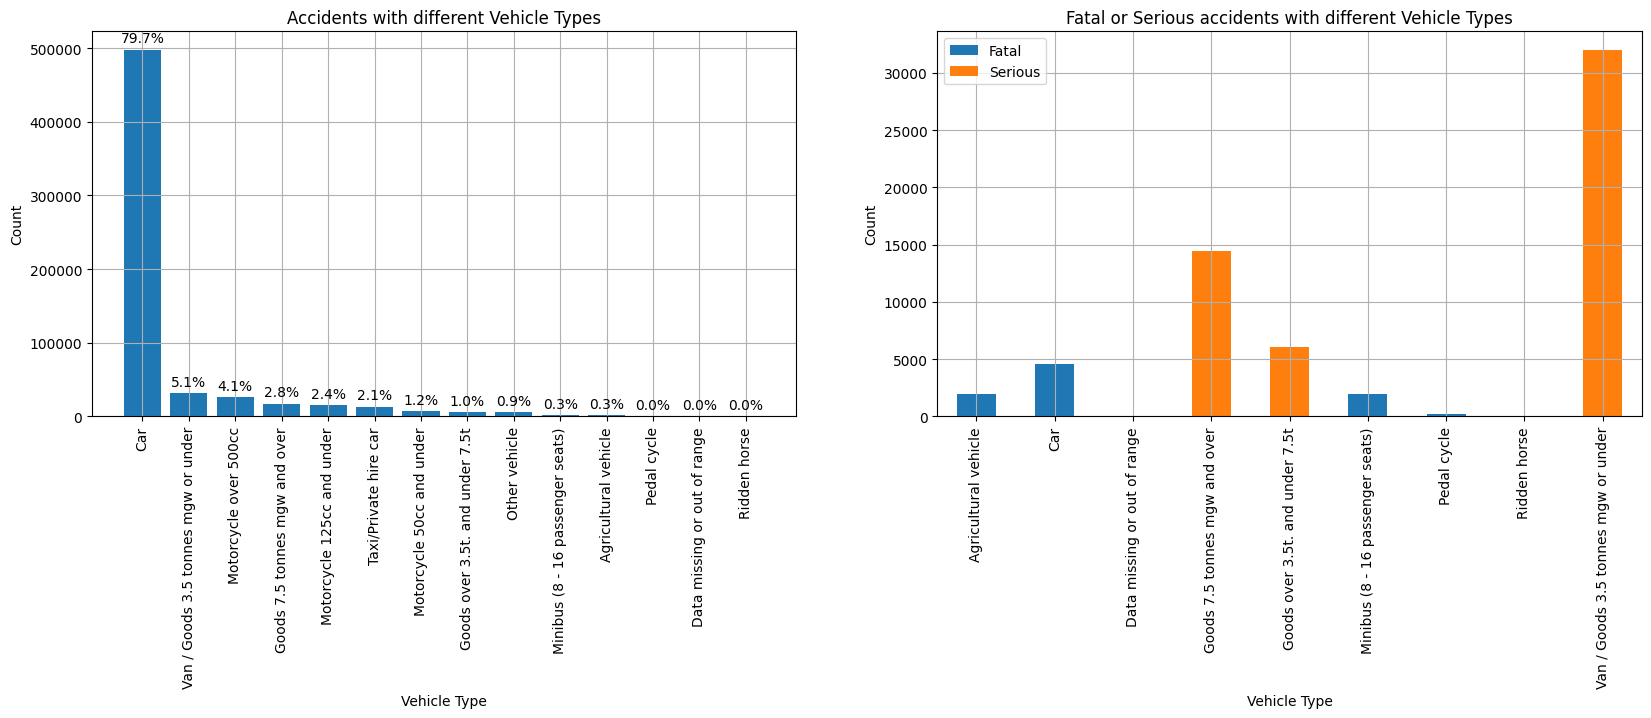

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# First plot: Bar chart of accidents with different vehicle types
ax1 = axs[0]
# Get the count of accidents for each vehicle type
subject = df['Vehicle_Type'].value_counts().reset_index(name='Count')
ax1.bar(subject['Vehicle_Type'], subject['Count'])
percentage = subject['Count'].div(subject['Count'].sum()) * 100
ax1.bar_label(ax1.containers[0], labels=['{:.1f}%'.format(p) for p in percentage], padding=3)
ax1.set_xlabel('Vehicle Type')
ax1.set_ylabel('Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Accidents with different Vehicle Types')
ax1.grid(True)

# Second plot: Stacked bar chart of fatal or serious accidents with different vehicle types
ax2 = axs[1]
# Filter data for fatal or serious accidents
subject = df[df['Accident_Severity'] != 'Slight'].groupby(['Vehicle_Type', 'Accident_Severity']).size().reset_index(name='Count')
pivot_df = subject.pivot(index='Vehicle_Type', columns='Accident_Severity', values='Count')
pivot_df.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xlabel('Vehicle Type')
ax2.set_ylabel('Count')
ax2.set_title('Fatal or Serious accidents with different Vehicle Types')
ax2.legend(loc="upper left")
ax2.grid(True)

plt.show()

* Bar Chart (Accidents with Different Vehicle Types):

Shows the total number of accidents that involved each vehicle type (e.g., car, motorcycle, bus).

**Most of all accidents usually involve a car.**

* Stacked Bar Chart (Fatal or Serious Accidents with Different Vehicle Types):

Specifically focuses on fatal or serious accidents.
Displays the breakdown of fatal and serious accidents within each vehicle type.

**Serious accidents happen mostly in Vans under 3.5 tonnes, a little less in Vans above that tonnage. Fatal accidents usually involve cars, minibusses, agricultural vehicles and bikes.**

### Road Type

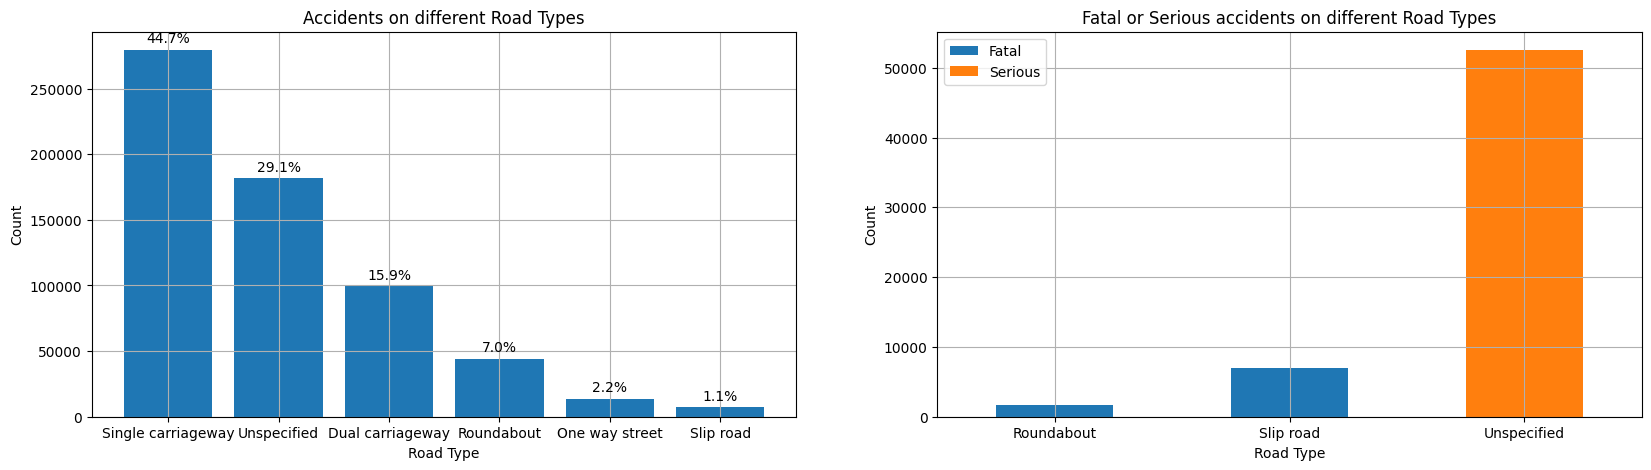

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# First plot: Bar chart of accidents on different road types
ax1 = axs[0]
# Get the count of accidents for each road type
subject = df['Road_Type'].value_counts().reset_index(name='Count')
ax1.bar(subject['Road_Type'], subject['Count'])
percentage = subject['Count'].div(subject['Count'].sum()) * 100
ax1.bar_label(ax1.containers[0], labels=['{:.1f}%'.format(p) for p in percentage], padding=3)
ax1.set_xlabel('Road Type')
ax1.set_ylabel('Count')
ax1.set_title('Accidents on different Road Types')
ax1.grid(True)

# Second plot: Stacked bar chart of fatal or serious accidents on different road types
ax2 = axs[1]
# Filter data for fatal or serious accidents
subject = df[df['Accident_Severity'] != 'Slight'].groupby(['Road_Type', 'Accident_Severity']).size().reset_index(name='Count')
pivot_df = subject.pivot(index='Road_Type', columns='Accident_Severity', values='Count')
pivot_df.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xlabel('Road Type')
ax2.set_ylabel('Count')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_title('Fatal or Serious accidents on different Road Types')
ax2.legend(loc="upper left")
ax2.grid(True)

plt.show()

* Bar Chart (Accidents on Different Road Types):

Shows the total number of accidents that occurred on each road type (e.g., single carriageway, dual carriageway, roundabout).

**Most of accidents happen in Single or Dual carriageways. Many accidents have no road type specified.**

* Stacked Bar Chart (Fatal or Serious Accidents on Different Road Types):

Specifically focuses on fatal or serious accidents.
Displays the breakdown of fatal and serious accidents within each road type.

**None of the Serious accidents had road type specified. Fatal accidents happen mostly in Slip road or Roundabouts.**

### Number of Vehicles

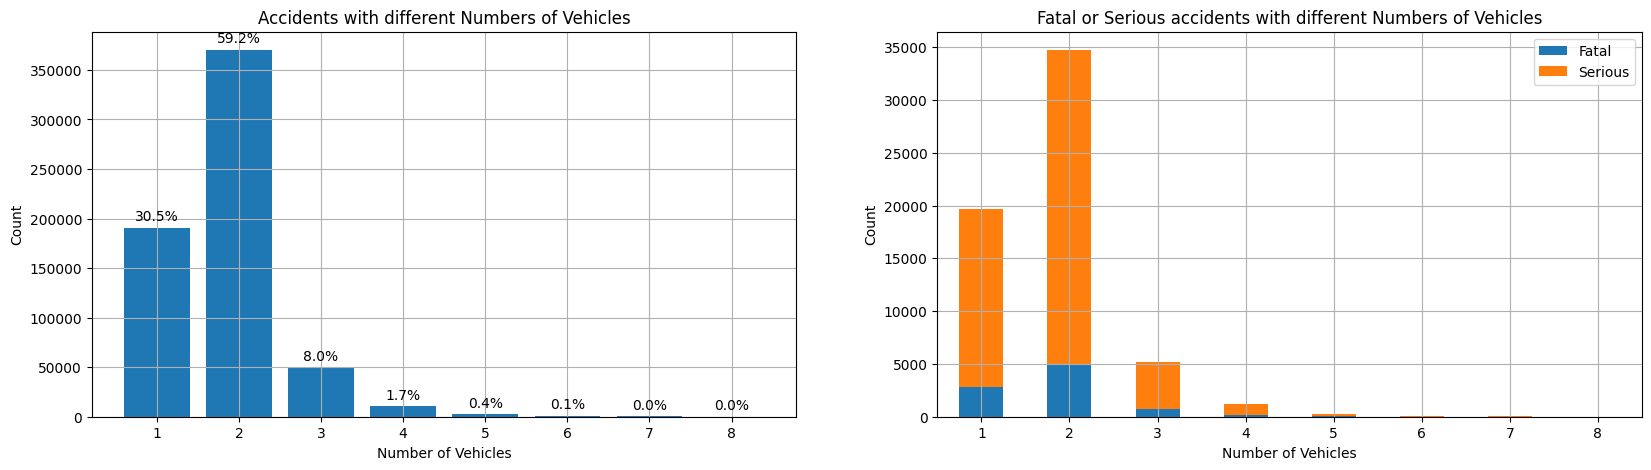

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# First plot: Bar chart of accidents with different numbers of vehicles
ax1 = axs[0]
# Get the count of accidents for each number of vehicles (limiting to the top 8 for visual clarity)
subject = df['Number_of_Vehicles'].value_counts().reset_index(name='Count').head(8)
ax1.bar(subject['Number_of_Vehicles'], subject['Count'])
percentage = subject['Count'].div(subject['Count'].sum()) * 100
ax1.bar_label(ax1.containers[0], labels=['{:.1f}%'.format(p) for p in percentage], padding=3)
ax1.set_xlabel('Number of Vehicles')
ax1.set_ylabel('Count')
ax1.set_title('Accidents with different Numbers of Vehicles')
ax1.grid(True)

# Second plot: Stacked bar chart of fatal or serious accidents with different numbers of vehicles
ax2 = axs[1]
# Filter data for fatal or serious accidents
subject = df[df['Accident_Severity'] != 'Slight'].groupby(['Number_of_Vehicles', 'Accident_Severity']).size().reset_index(name='Count').head(15)
pivot_df = subject.pivot(index='Number_of_Vehicles', columns='Accident_Severity', values='Count')
pivot_df.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xlabel('Number of Vehicles')
ax2.set_ylabel('Count')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_title('Fatal or Serious accidents with different Numbers of Vehicles')
ax2.legend(loc="upper right")
ax2.grid(True)

plt.show()

* Bar Chart (Accidents with Different Numbers of Vehicles):

Shows the total number of accidents that involved different numbers of vehicles (limited to the top 8 for visual clarity).

**Most road accidents involve 1 or 2 vehicles**

* Stacked Bar Chart (Fatal or Serious Accidents with Different Numbers of Vehicles):

Specifically focuses on fatal or serious accidents.
Displays the breakdown of fatal and serious accidents for different numbers of vehicles involved (limited to the top 15 for clarity).

**Accident Severity distribution is relative to total number of accidents**

### Road Surface Conditions

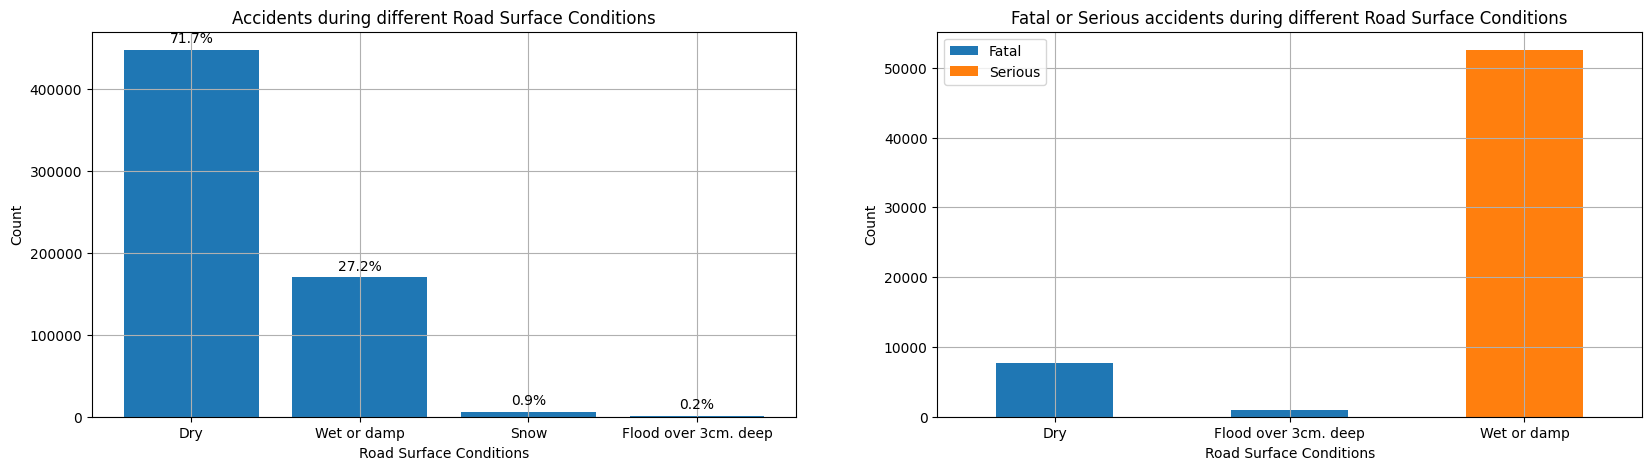

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# First plot: Bar chart of accidents during different road surface conditions
ax1 = axs[0]
# Get the count of accidents for each road surface condition
subject = df['Road_Surface_Conditions'].value_counts().reset_index(name='Count')
ax1.bar(subject['Road_Surface_Conditions'], subject['Count'])
percentage = subject['Count'].div(subject['Count'].sum()) * 100
ax1.bar_label(ax1.containers[0], labels=['{:.1f}%'.format(p) for p in percentage], padding=3)
ax1.set_xlabel('Road Surface Conditions')
ax1.set_ylabel('Count')
ax1.set_title('Accidents during different Road Surface Conditions')
ax1.grid(True)

# Second plot: Stacked bar chart of fatal or serious accidents during different road surface conditions
ax2 = axs[1]
# Filter data for fatal or serious accidents
subject = df[df['Accident_Severity'] != 'Slight'].groupby(['Road_Surface_Conditions', 'Accident_Severity']).size().reset_index(name='Count')
pivot_df = subject.pivot(index='Road_Surface_Conditions', columns='Accident_Severity', values='Count')
pivot_df.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xlabel('Road Surface Conditions')
ax2.set_ylabel('Count')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_title('Fatal or Serious accidents during different Road Surface Conditions')
ax2.legend(loc="upper left")
ax2.grid(True)

plt.show()

* Bar Chart (Accidents During Different Road Surface Conditions):

Shows the total number of accidents that occurred under each road surface condition (e.g., dry, wet, icy).

**Most of accidents happen in Dry or Wet/damp roads**

* Stacked Bar Chart (Fatal or Serious Accidents During Different Road Surface Conditions):

Specifically focuses on fatal or serious accidents.
Displays the breakdown of fatal and serious accidents within each road surface condition.

**Serious accidents happen mostly in Wet or Damp roads, while Fatal ones happen in Dry or with floods over 3cm deep**

### Urban or Rural Area

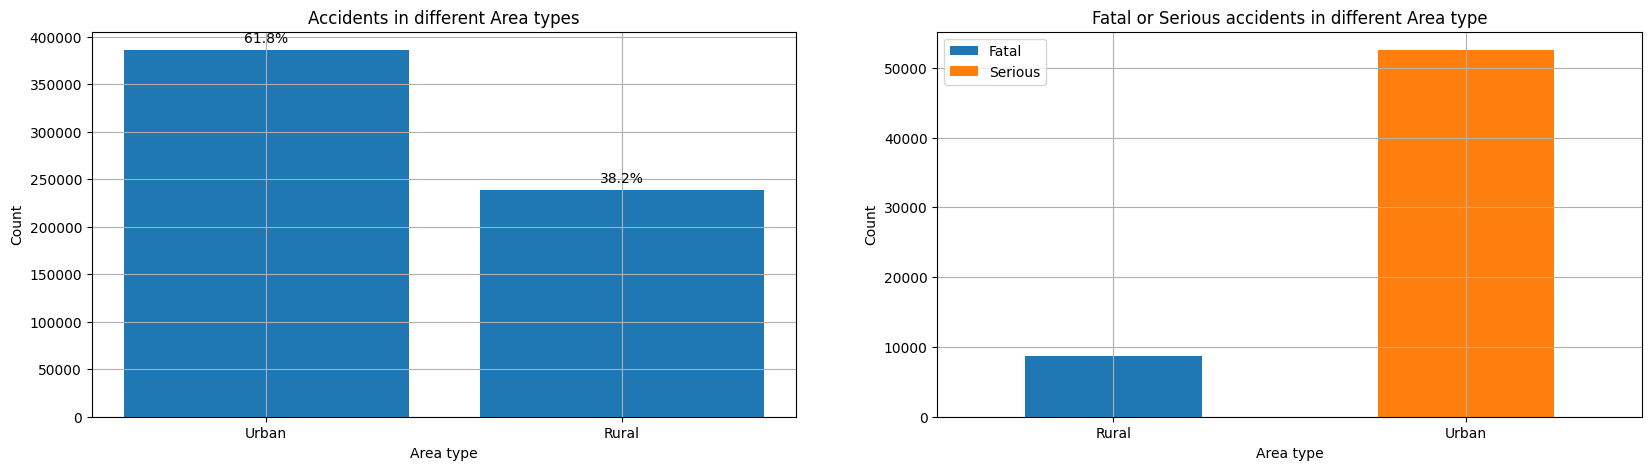

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# First plot: Bar chart of accidents in different area types
ax1 = axs[0]
# Get the count of accidents for each area type
subject = df['Urban_or_Rural_Area'].value_counts().reset_index(name='Count')
ax1.bar(subject['Urban_or_Rural_Area'], subject['Count'])
percentage = subject['Count'].div(subject['Count'].sum()) * 100
ax1.bar_label(ax1.containers[0], labels=['{:.1f}%'.format(p) for p in percentage], padding=3)
ax1.set_xlabel('Area type')
ax1.set_ylabel('Count')
ax1.set_title('Accidents in different Area types')
ax1.grid(True)

# Second plot: Stacked bar chart of fatal or serious accidents in different area types
ax2 = axs[1]
# Filter data for fatal or serious accidents
subject = df[df['Accident_Severity'] != 'Slight'].groupby(['Urban_or_Rural_Area', 'Accident_Severity']).size().reset_index(name='Count')
pivot_df = subject.pivot(index='Urban_or_Rural_Area', columns='Accident_Severity', values='Count')
pivot_df.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xlabel('Area type')
ax2.set_ylabel('Count')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_title('Fatal or Serious accidents in different Area type')
ax2.legend(loc="upper left")
ax2.grid(True)

plt.show()

* Bar Chart (Accidents in Different Area Types):

Shows the total number of accidents that occurred in urban and rural areas.

**Majority of Accidents happen in Urban areas**

* Stacked Bar Chart (Fatal or Serious Accidents in Different Area Types):

Specifically focuses on fatal or serious accidents.
Displays the breakdown of fatal and serious accidents within each area type (urban and rural).

**Serious accidents tend to happen in Urban areas, while Fatal ones happen in Rural areas**

### Number of Casualties

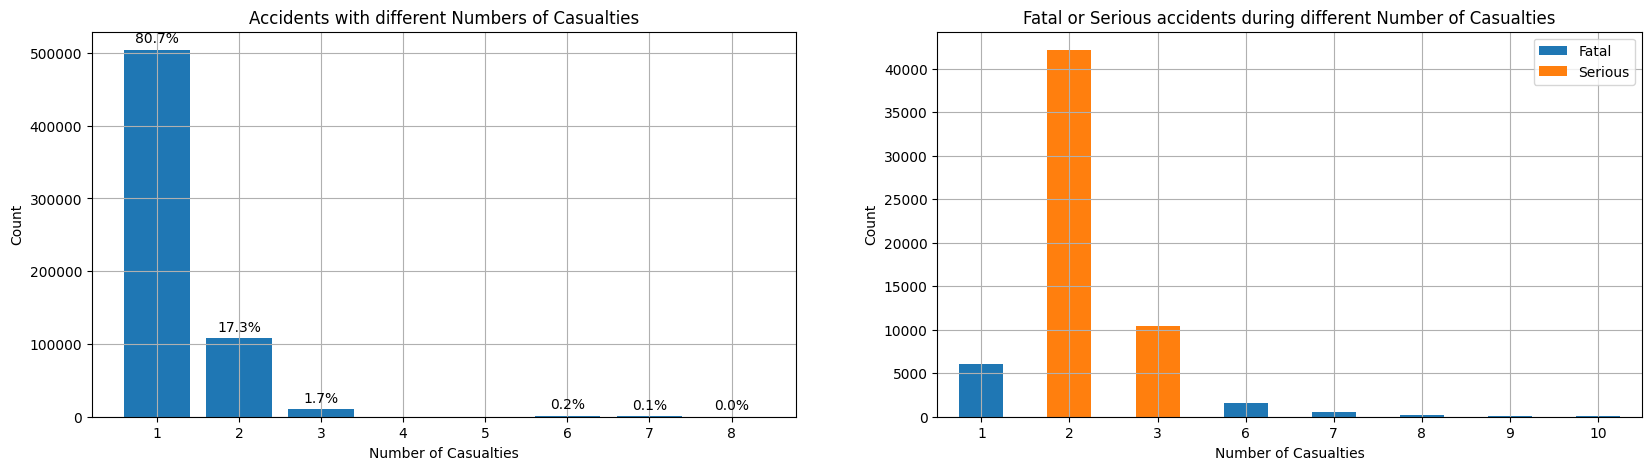

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# First plot: Bar chart of accidents with different numbers of casualties
ax1 = axs[0]
# Get the count of accidents for each number of casualties (limiting to the top 6 for visual clarity)
subject = df['Number_of_Casualties'].value_counts().reset_index(name='Count').head(6)
ax1.bar(subject['Number_of_Casualties'], subject['Count'])
percentage = subject['Count'].div(subject['Count'].sum()) * 100
ax1.bar_label(ax1.containers[0], labels=['{:.1f}%'.format(p) for p in percentage], padding=3)
ax1.set_xlabel('Number of Casualties')
ax1.set_ylabel('Count')
ax1.set_title('Accidents with different Numbers of Casualties')
ax1.grid(True)

# Second plot: Stacked bar chart of fatal or serious accidents with different numbers of casualties
ax2 = axs[1]
# Filter data for fatal or serious accidents
subject = df[df['Accident_Severity'] != 'Slight'].groupby(['Number_of_Casualties', 'Accident_Severity']).size().reset_index(name='Count').head(8)
pivot_df = subject.pivot(index='Number_of_Casualties', columns='Accident_Severity', values='Count')
pivot_df.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xlabel('Number of Casualties')
ax2.set_ylabel('Count')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_title('Fatal or Serious accidents during different Number of Casualties')
ax2.legend(loc="upper right")
ax2.grid(True)

plt.show()

* Bar Chart (Accidents with Different Numbers of Casualties):

Shows the total number of accidents that involved different numbers of casualties (limited to the top 6 for clarity).

**Most of accidents involve 1-2 casualties**

* Stacked Bar Chart (Fatal or Serious Accidents with Different Numbers of Casualties):

Specifically focuses on fatal or serious accidents.
Displays the breakdown of fatal and serious accidents for different numbers of casualties (limited to the top 8 for clarity).

**Serious accidents involve 2-3 casualties, while Fatal one usually involve 1 or more than 6 casualties**

### Temporal Analysis

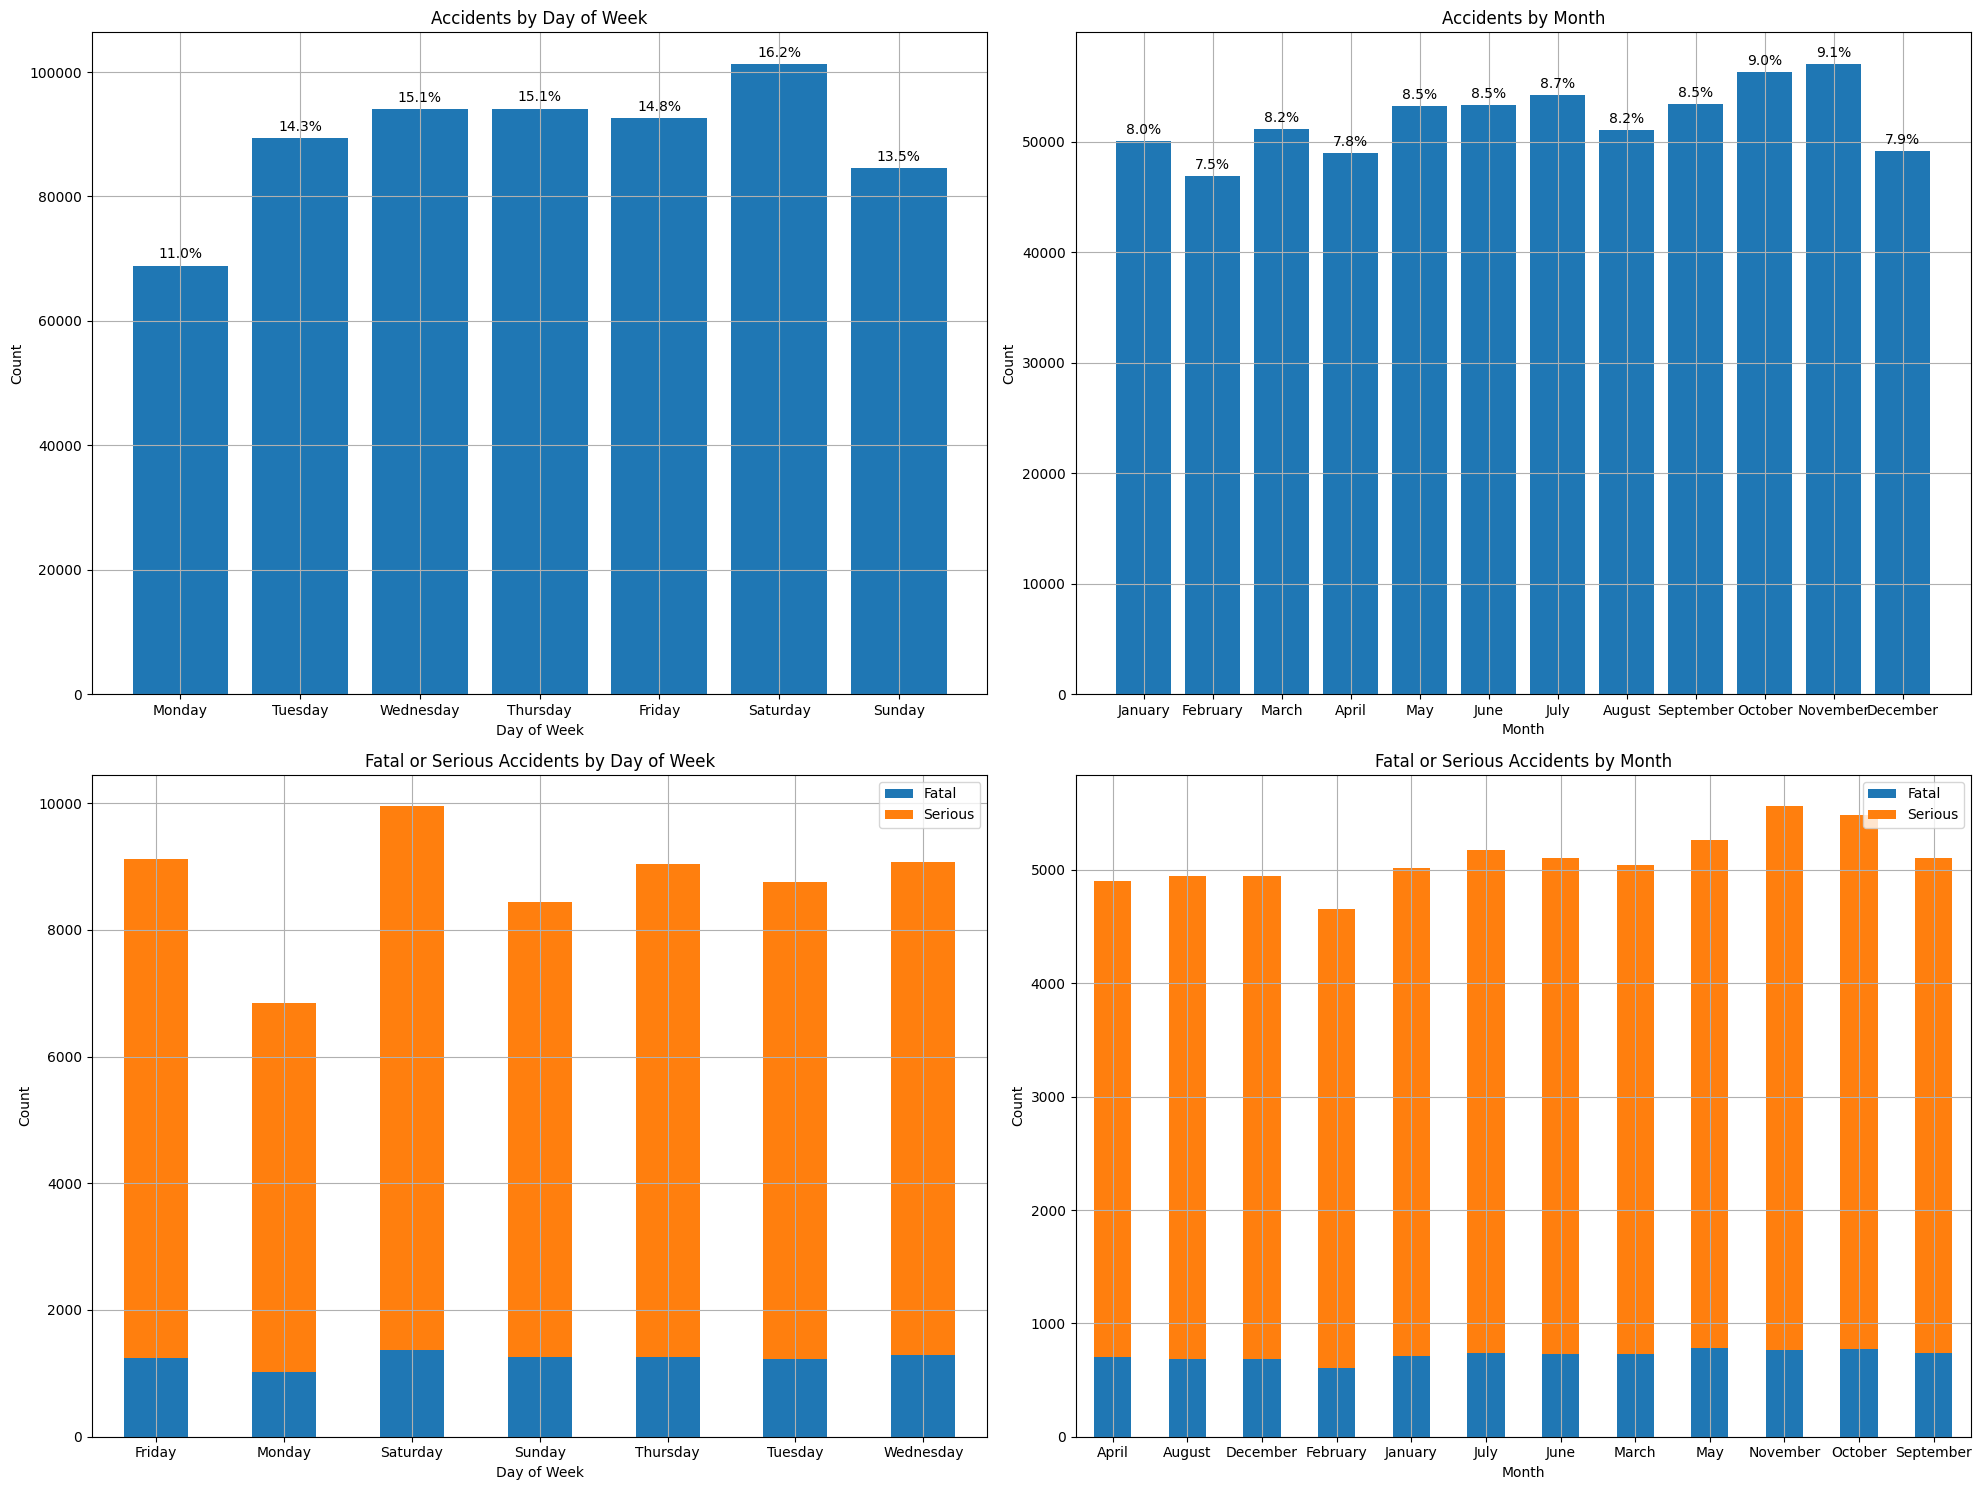

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# First plot (top left): Bar chart of accidents by day of week
ax1 = axs[0, 0]
# Get the count of accidents for each day of week
subject = df['Accident_Date'].dt.dayofweek.value_counts().reset_index(name='Count').sort_values('Accident_Date')
subject['Accident_Date'] = subject['Accident_Date'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
ax1.bar(subject['Accident_Date'], subject['Count'])
percentage = subject['Count'].div(subject['Count'].sum()) * 100
ax1.bar_label(ax1.containers[0], labels=['{:.1f}%'.format(p) for p in percentage], padding=3)
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Count')
ax1.set_title('Accidents by Day of Week')
ax1.grid(True)

# Second plot (top right): Bar chart of accidents by month
ax2 = axs[0, 1]
# Get the count of accidents for each month
subject = df['Accident_Date'].dt.month.value_counts().reset_index(name='Count').sort_values('Accident_Date')
subject['Accident_Date'] = subject['Accident_Date'].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',
                                                            8:'August',9:'September',10:'October',11:'November',12:'December'})
ax2.bar(subject['Accident_Date'], subject['Count'])
percentage = subject['Count'].div(subject['Count'].sum()) * 100
ax2.bar_label(ax2.containers[0], labels=['{:.1f}%'.format(p) for p in percentage], padding=3)
ax2.set_xlabel('Month')
ax2.set_ylabel('Count')
ax2.set_title('Accidents by Month')
ax2.grid(True)

# Third plot (bottom left): Stacked bar chart of fatal or serious accidents by day of week
ax3 = axs[1, 0]
# Filter for fatal or serious accidents and group by day of week and severity
subject = df[df['Accident_Severity'] != 'Slight'].groupby([df['Accident_Date'].dt.dayofweek, 'Accident_Severity']).size().reset_index(name='Count')
subject['Accident_Date'] = subject['Accident_Date'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
pivot_df = subject.pivot(index='Accident_Date', columns='Accident_Severity', values='Count')
pivot_df.plot(kind='bar', stacked=True, ax=ax3)
ax3.set_xlabel('Day of Week')
ax3.set_ylabel('Count')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.set_title('Fatal or Serious Accidents by Day of Week')
ax3.legend(loc="upper right")
ax3.grid(True)

# Fourth plot (bottom right): Stacked bar chart of fatal or serious accidents by month
ax4 = axs[1, 1]
# Filter for fatal or serious accidents and group by month and severity
subject = df[df['Accident_Severity'] != 'Slight'].groupby([df['Accident_Date'].dt.month, 'Accident_Severity']).size().reset_index(name='Count')
subject['Accident_Date'] = subject['Accident_Date'].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',
                                                            8:'August',9:'September',10:'October',11:'November',12:'December'})
pivot_df = subject.pivot(index='Accident_Date', columns='Accident_Severity', values='Count')
pivot_df.plot(kind='bar', stacked=True, ax=ax4)
ax4.set_xlabel('Month')
ax4.set_ylabel('Count')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)
ax4.set_title('Fatal or Serious Accidents by Month')
ax4.legend(loc="upper right")
ax4.grid(True)

fig.tight_layout()

plt.show()

* Accidents by day of week (both all accidents and fatal/serious)

**Most accidents happen on Saturdays, least on Monday**

* Accidents by month (both all accidents and fatal/serious)

**Most accidents happen in October and November, least in February**

### Road Type and Surface Conditions

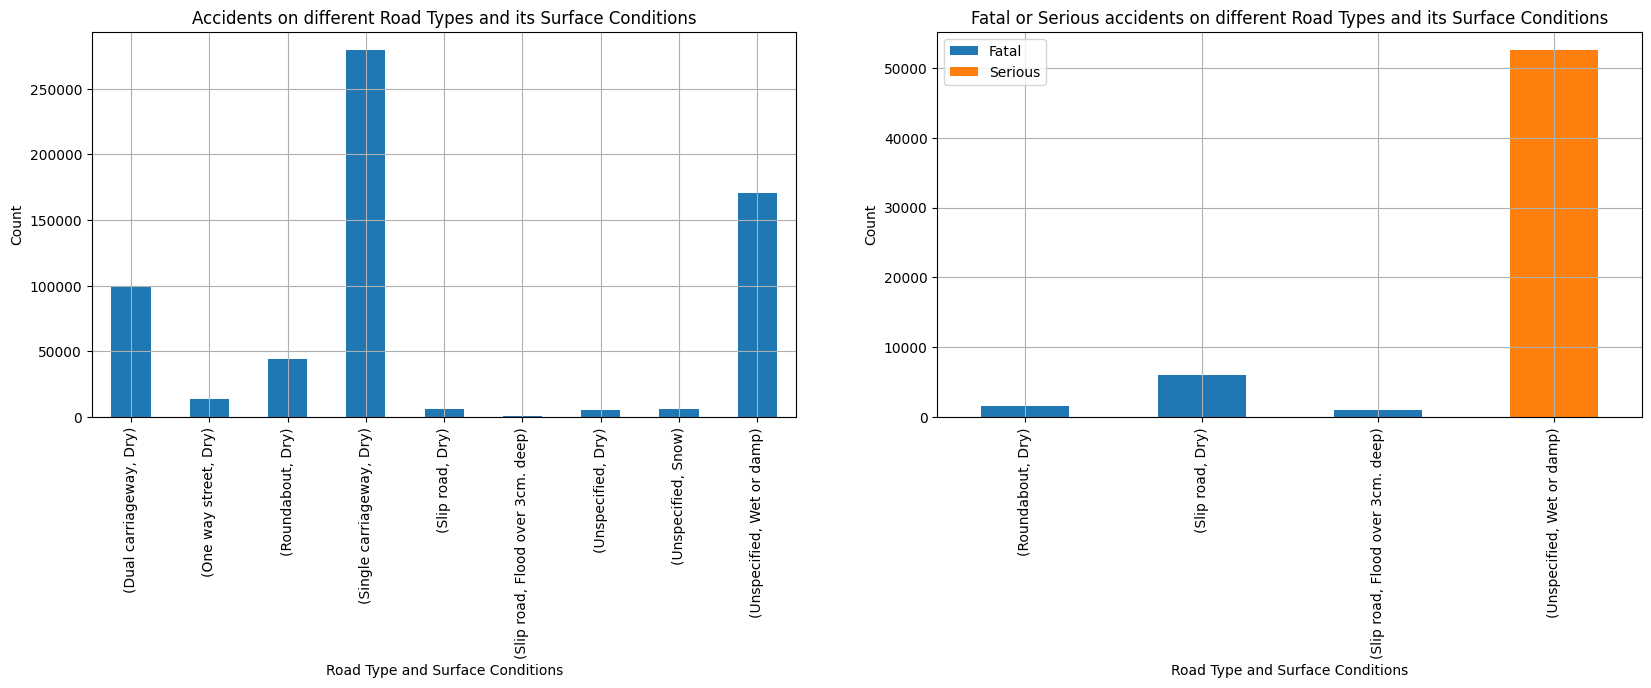

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# First plot: Stacked bar chart of accidents on different road types and surface conditions
ax1 = axs[0]
# Group the data by road type and surface conditions, and count the occurrences
subject = df[['Road_Type', 'Road_Surface_Conditions']].groupby(['Road_Type', 'Road_Surface_Conditions']).value_counts()
subject.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_xlabel('Road Type and Surface Conditions')
ax1.set_ylabel('Count')
ax1.set_title('Accidents on different Road Types and its Surface Conditions')
ax1.grid(True)

# Second plot: Stacked bar chart of fatal or serious accidents on different road types and surface conditions
ax2 = axs[1]
# Filter for fatal or serious accidents and group by road type, surface conditions, and severity
subject = df[df['Accident_Severity'] != 'Slight'][['Road_Type', 'Road_Surface_Conditions', 'Accident_Severity']].groupby(['Road_Type', 'Road_Surface_Conditions'])['Accident_Severity'].value_counts().unstack()
subject.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xlabel('Road Type and Surface Conditions')
ax2.set_ylabel('Count')
ax2.set_title('Fatal or Serious accidents on different Road Types and its Surface Conditions')
ax2.legend(loc="upper left")
ax2.grid(True)

plt.show()

* Bar Chart (All Accidents on different Road Types and its Surface Conditions):

Shows the total number of accidents that occurred on different combinations of road types and surface conditions.

**Most accidents happen on Dry Single or Dual Carriageways**

* Stacked Bar Chart (Fatal or Serious Accidents):

Focuses specifically on fatal or serious accidents.
Displays the breakdown of fatal and serious accidents for each combination of road type and surface condition.

**Fatal accidentss happen on Dry Roundabouts or Slip roads in both Dry or flood conditions. Serious accidents happen in wet road conditions, but it is unclear on which types of road.**

### Light Conditions and Area Type

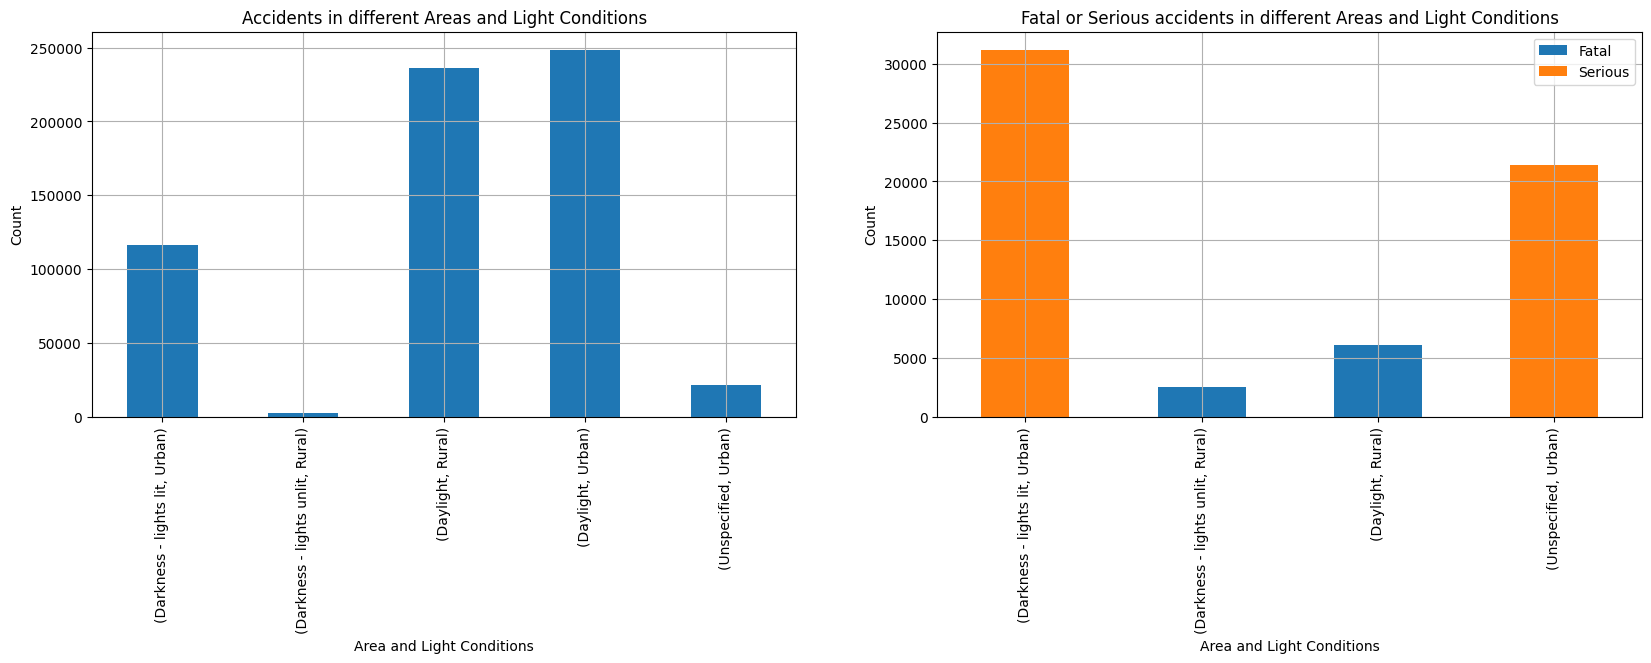

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# First plot: Stacked bar chart of accidents in different areas and light conditions
ax1 = axs[0]
# Group the data by light conditions and area, and count the occurrences
subject = df[['Light_Conditions', 'Urban_or_Rural_Area']].groupby(['Light_Conditions', 'Urban_or_Rural_Area']).value_counts()
subject.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_xlabel('Area and Light Conditions')
ax1.set_ylabel('Count')
ax1.set_title('Accidents in different Areas and Light Conditions')
ax1.grid(True)

# Second plot: Stacked bar chart of fatal or serious accidents in different areas and light conditions
ax2 = axs[1]
# Filter for fatal or serious accidents and group by light conditions, area, and severity
subject = df[df['Accident_Severity'] != 'Slight'][['Light_Conditions', 'Urban_or_Rural_Area', 'Accident_Severity']].groupby(['Light_Conditions', 'Urban_or_Rural_Area'])['Accident_Severity'].value_counts().unstack()
subject.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xlabel('Area and Light Conditions')
ax2.set_ylabel('Count')
ax2.set_title('Fatal or Serious accidents in different Areas and Light Conditions')
ax2.legend(loc="upper right")
ax2.grid(True)

plt.show()

* Stacked Bar Chart (All Accidents):

Shows the total number of accidents that occurred in different combinations of areas (urban or rural) and light conditions.

**Most accidents happen during daylight in both Rural and Urban areas, also in Urban areas during darkness, but with lights lit up**

* Stacked Bar Chart (Fatal or Serious Accidents):

Focuses specifically on fatal or serious accidents.
Displays the breakdown of fatal and serious accidents for each combination of area and light condition.

**Serious accidents happed in Urban areas at night but with lights lit up. Fatal accidents happen more in Rural areas during daylight or at night without lights on**

### Light and Weather Conditions

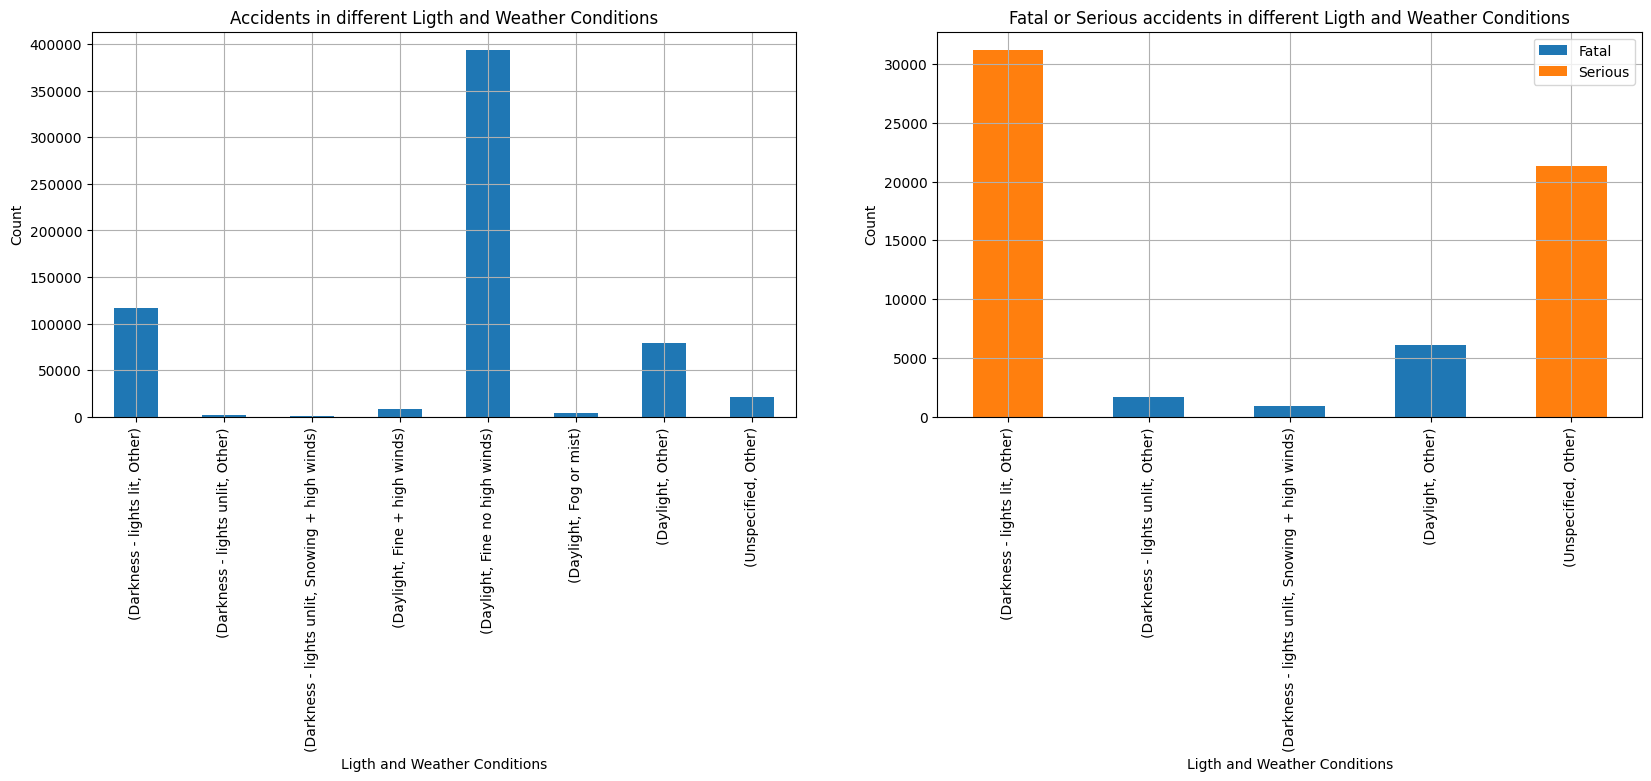

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# First plot: Stacked bar chart of accidents in different light and weather conditions
ax1 = axs[0]
# Group the data by light conditions and weather conditions, and count the occurrences
subject = df[['Light_Conditions', 'Weather_Conditions']].groupby(['Light_Conditions', 'Weather_Conditions']).value_counts()
subject.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_xlabel('Ligth and Weather Conditions')
ax1.set_ylabel('Count')
ax1.set_title('Accidents in different Ligth and Weather Conditions')
ax1.grid(True)

# Second plot: Stacked bar chart of fatal or serious accidents in different light and weather conditions
ax2 = axs[1]
# Filter for fatal or serious accidents and group by light conditions, weather conditions, and severity
subject = df[df['Accident_Severity'] != 'Slight'][['Light_Conditions', 'Weather_Conditions', 'Accident_Severity']].groupby(['Light_Conditions', 'Weather_Conditions'])['Accident_Severity'].value_counts().unstack()
subject.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xlabel('Ligth and Weather Conditions')
ax2.set_ylabel('Count')
ax2.set_title('Fatal or Serious accidents in different Ligth and Weather Conditions')
ax2.legend(loc="upper right")
ax2.grid(True)

plt.show()

* Stacked Bar Chart (All Accidents):

Shows the total number of accidents that occurred under different combinations of light conditions and weather conditions.

**Most accidents happen in daylight with fine weather (no wind).**

* Stacked Bar Chart (Fatal or Serious Accidents):

Focuses specifically on fatal or serious accidents.
Displays the breakdown of fatal and serious accidents for each combination of light and weather conditions.

**Most Serious accidents happen at night with lights lit up, but with weather conditions unspecified. Fatal accidents appear in daylight or nighttime with lights unlit. While weather conditions are unspecified, often they involve snowing with high winds**

## Summary

Most of the accidents result in slight injuries, while serious and fatal accidents are less common. The number of accidents has been decreasing from 2019 to 2023, with the lowest rates in February and Monday. The highest rates of accidents occur in October and November, and on Saturdays. Most of the accidents happen in urban areas, especially in London and the mid-lands, where major cities are located. However, fatal accidents are more likely to happen in rural areas, especially on roundabouts and slip roads. The most common type of road where accidents happen is single or dual carriageway, but many accidents have no road type specified. The most common type of vehicle involved in accidents is car, but serious and fatal accidents also involve vans, minibuses, agricultural vehicles, and bikes. Most of the accidents involve one or two vehicles, and one or two casualties. However, serious accidents tend to involve more vehicles and casualties, while fatal accidents can involve either one or more than six casualties. The most common light condition where accidents happen is daylight, but serious and fatal accidents also happen in darkness, with or without lights. The most common weather condition where accidents happen is fine with no wind, but many serious and fatal accidents have no weather condition specified. Some of the fatal accidents also involve snowing with high winds. These patterns and factors can help to identify the risk factors and preventive measures for road safety.

# Pre-processing
---

In [24]:
# Creating Day of Week and Month features
df['Day_of_Week'] = df['Accident_Date'].dt.dayofweek

df['Month'] = df['Accident_Date'].dt.month

In [25]:
# Applying Label Encoder
le = LabelEncoder()
df_proc = df[['Light_Conditions', 'Urban_or_Rural_Area', 'Accident_Severity', 'District_Area', 'Road_Surface_Conditions', 'Road_Type', 'Weather_Conditions', 'Vehicle_Type', 'Day_of_Week', 'Month']].apply(lambda col: le.fit_transform(col))

df_proc[['Accident_Date', 'Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Day_of_Week', 'Month']] = df[['Accident_Date', 'Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Day_of_Week', 'Month']]

### Heat map of correlations between different features in dataset

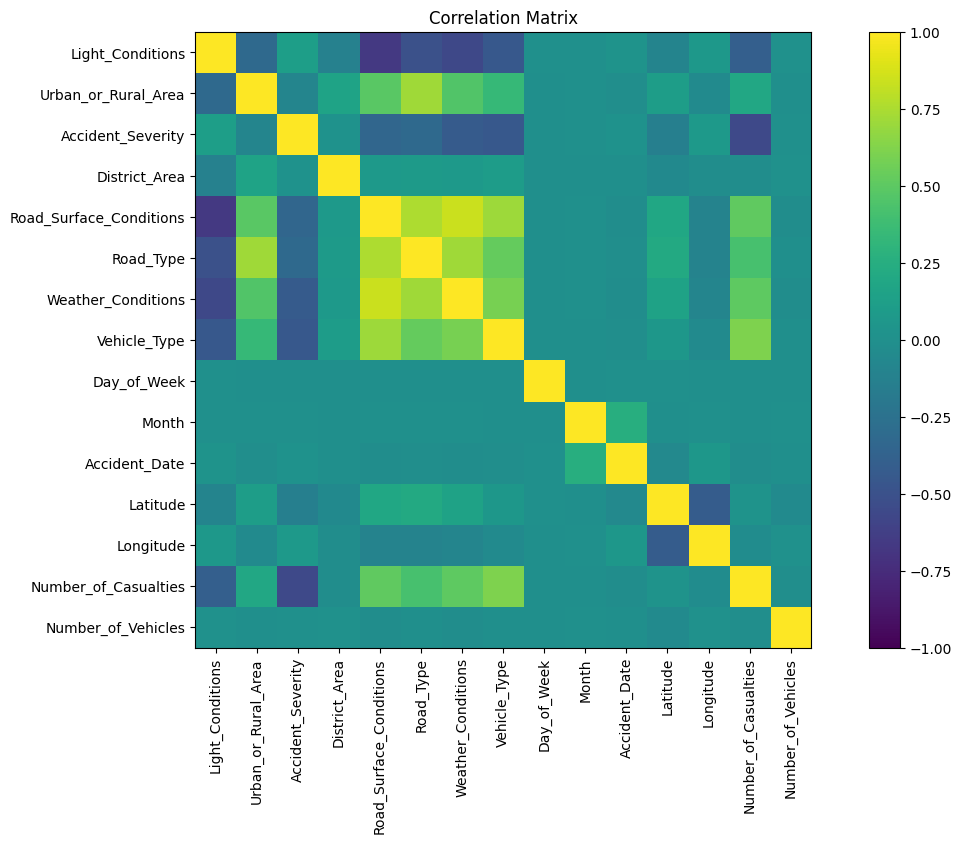

In [26]:
plt.figure(figsize=(15,8))

plt.imshow(df_proc.corr(), cmap='viridis', vmin=-1, vmax=1)
plt.xticks(range(len(df_proc.corr().columns)), df_proc.corr().columns, rotation=90)
plt.yticks(range(len(df_proc.corr().columns)), df_proc.corr().columns)
plt.colorbar()
plt.title('Correlation Matrix')

plt.show()

The correlation matrix shows several notable relationships between Accident_Severity and other features:

Accident_Severity has a strong negative correlation with Number_of_Casualties (-0.562). This indicates that more severe accidents tend to result in more casualties. As accident severity increases, the number of casualties also tends to increase.

It also has a moderate negative correlation with Vehicle_Type (-0.451). This suggests that accidents involving certain types of vehicles tend to be more severe. For example, collisions with larger vehicles like lorries may lead to worse outcomes than those only involving smaller cars.

Additionally, Accident_Severity has a weak negative correlation with Weather_Conditions (-0.429) and Road_Surface_Conditions (-0.339). This implies that harsher weather and poorer road surface quality are related to more severe accident outcomes. Rain, snow, or ice on the roads could exacerbate accidents as could poor road surfaces.

However, Accident_Severity has very weak correlations with other features like Day_of_Week, Month, Urban vs Rural Area, etc. These do not appear to be informative factors associated with severity based on this data.

In summary, the main drivers linked with Accident_Severity seem to be the Number_of_Casualties, Vehicle_Type, Weather_Conditions, and Road_Surface_Conditions. These features have clear relationships that may impact or reflect the severity of accidents. Other variables do not demonstrate strong connections in the dataset.

# Model Training
---

In [27]:
# Dropping Irrelevant features
final = df_proc.drop(['Number_of_Casualties','Accident_Date','District_Area','Longitude','Latitude'],axis=1)

In [28]:
final.head()

,Light_Conditions,Urban_or_Rural_Area,Accident_Severity,Road_Surface_Conditions,Road_Type,Weather_Conditions,Vehicle_Type,Day_of_Week,Month,Number_of_Vehicles
3,1,0,0,1,4,4,0,6,2,1
4,1,0,0,1,4,4,5,5,2,1
5,1,0,0,1,4,4,0,3,2,1
6,1,0,0,1,4,4,5,4,3,1
7,1,0,0,1,4,4,5,4,3,1


In [29]:
# Separating Features and Target
X = final.drop(['Accident_Severity'], axis=1)
y = final['Accident_Severity']

# Splitting Training and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
# Building Decision Tree model
dtree = DecisionTreeClassifier()
    
dtree.fit(X_train, y_train)
dtree_results = dtree.predict(X_test)
dtree_mae = mean_absolute_error(y_test, dtree_results)
print('Decision Tree:\n' + classification_report(y_test, dtree_results))

Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      2644
           1       0.95      1.00      0.97     15625
           2       1.00      0.99      1.00    169231

    accuracy                           0.99    187500
   macro avg       0.98      0.94      0.96    187500
weighted avg       0.99      0.99      0.99    187500



In the model training phase of the project, a comprehensive dataset consisting of various pertinent features such as light conditions, urban or rural area classification, road surface conditions, road type, weather conditions, vehicle types, day of the week, month, and number of vehicles involved was utilized. The aim was to predict accident severity levels. The dataset was preprocessed meticulously, addressing missing values, encoding categorical variables, and handling outliers to ensure data quality. A Decision Tree algorithm was chosen for its interpretability and effectiveness in handling categorical data. The model was trained on a subset of the dataset and validated on another to assess its performance. The results achieved were notably promising, with an overall accuracy of 99% and high precision and recall scores across different severity levels. Specifically, the model exhibited remarkable precision rates of 98% for Slight severity, 95% for Severe severity, and 100% for Fatal severity, along with robust recall rates, particularly identifying all instances of Severe severity and most instances of Fatal severity accurately. These outcomes indicate the model's proficiency in distinguishing between different levels of accident severity based on the provided features, providing a solid foundation for further analysis and potential deployment for real-world applications in accident prevention and response strategies.